# Homework 4
## By Vyanna Hill

### Chapter 8

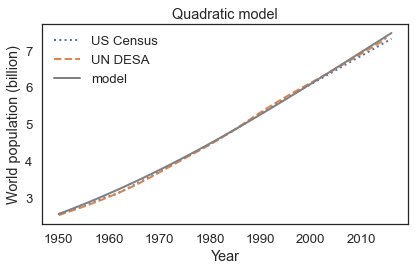

In [1]:
#Code derived from Alleny's chapter 8
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

from pandas import read_html

#From last's chapter
filename = 'World_population_estimates.html'
tables = read_html(filename,header=0,index_col=0,decimal='M')

# below is last chapter's code, derive by allen downey
table2 = tables[2]
table2.columns = ['census', 'prb', 'un', 'maddison', 
                  'hyde', 'tanton', 'biraben', 'mj', 
                  'thomlinson', 'durand', 'clark']

def plot_results(census, un, timeseries, title):
    """Plot the estimates and the model.
    
    census: TimeSeries of population estimates
    un: TimeSeries of population estimates
    timeseries: TimeSeries of simulation results
    title: string
    """
    plot(census, ':', label='US Census')
    plot(un, '--', label='UN DESA')
    plot(timeseries, color='gray', label='model')
    
    decorate(xlabel='Year', 
             ylabel='World population (billion)',
             title=title)
    
def run_simulation(system, update_func):
    """Simulate the system using any update function.
    
    system: System object
    update_func: function that computes the population next year
    
    returns: TimeSeries
    """
    results = TimeSeries()
    results[system.t_0] = system.p_0
    
    for t in linrange(system.t_0, system.t_end):
        results[t+1] = update_func(results[t], t, system)
        
    return results   

def update_func_quad(pop, t, system):
    """Update population based on a quadratic model.
    
    pop: current population in billions
    t: what year it is
    system: system object with model parameters
    """
    net_growth = system.alpha * pop + system.beta * pop**2
    return pop + net_growth
un = table2.un / 1e9
census = table2.census / 1e9

t_0 = get_first_label(census)
t_end = get_last_label(census)
p_0 = get_first_value(census)

system = System(t_0=t_0, 
                t_end=t_end,
                p_0=p_0,
                alpha=0.025,
                beta=-0.0018)

results = run_simulation(system, update_func_quad)
plot_results(census, un, results, 'Quadratic model')

Exercise 1
    What happens if we start with an initial population above the carrying capacity, like 20 billion? Run the model with initial populations between 1 and 20 billion, and plot the results on the same axes.

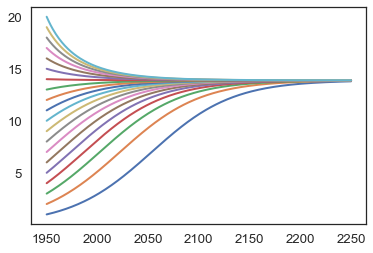

In [2]:
#intialize Population for one billion and one for 15 billion 
from numpy import linspace
#Extend the end year to the future and create a array from 1-20
system.t_end = 2250
P0_A=linspace(1,20,20)

#create a for loop that changes the P_0 from 1-20 billion and plot
for i in P0_A:
    system.p_0=i
    results = run_simulation(system, update_func_quad)
    plot(results)



It apppears that all the projections population stay stagement around 14 billion. The population cannot go higher than 14 billion as the planet's resources cannot support that amount. It is the reason why the population which started at 20 billion dropped immediately as the death rate increased. 

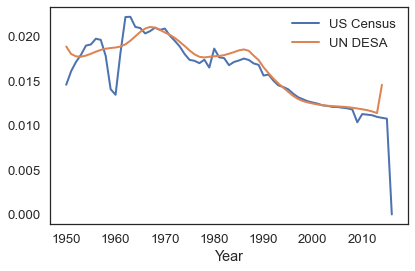

In [3]:
#derived from allen's chapter 8
alpha_census = compute_rel_diff(census)
plot(alpha_census, label='US Census')

alpha_un = compute_rel_diff(un)
plot(alpha_un, label='UN DESA')

decorate(xlabel='Year', label='Net growth rate')

def plot_projections(table):
    """Plot world population projections.
    
    table: DataFrame with columns 'un' and 'census'
    """
    census_proj = table.census / 1e9
    un_proj = table.un / 1e9
    
    plot(census_proj.dropna(), ':', color='C0', label='US Census')
    plot(un_proj.dropna(), '--', color='C1', label='UN DESA')

Exercises 2-8
Define a function, alpha_func, that takes t as a parameter and returns an estimate of the net growth rate at time t, based on a linear function alpha = intercept + slope * t. Choose values of slope and intercept to fit the observed net growth rates since 1965.

Call your function with a range of ts from 1960 to 2020 and plot the results.

Create a System object that includes alpha_func as a system variable.

Define an update function that uses alpha_func to compute the net growth rate at the given time t.

Test your update function with t_0 = 1960 and p_0 = census[t_0].

Run a simulation from 1960 to 2100 with your update function, and plot the results.

Compare your projections with those from the US Census and UN.

,values
1960,2.557629
1961,2.582172
1962,2.606825
1963,2.631583
1964,2.656447
1965,2.681413
1966,2.706480
1967,2.731646
1968,2.756909
1969,2.782265


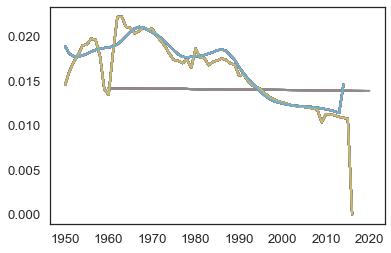

In [4]:
#Exercise 2
def alpha_func(t):
    slope=-0.000005
    intercept=0.024
    alpha= intercept+(slope*t)
    return alpha 

#Exercise 3
ts=linspace(1960,2020,60)
results = TimeSeries()

for a in ts:
        results[a]=alpha_func(a)
        plot(results)
        plot(alpha_census, label='US Census')
        plot(alpha_un, label='UN DESA')
        
# Exercise 4
system = System(t_0=t_0, 
                t_end=t_end,
                p_0=p_0,
                alpha_func=alpha_func,
                beta=-0.0018)

#Exercise 5
def update_alpha_func(pop, t, system):
    # call the alpha func to retrieve the alpha value, reuse quadratic net  growth above
    net_growth = system.alpha_func(t) * pop + system.beta * pop**2
    return pop + net_growth


#Exercise 6
system.t_0=1960
system.p_0=census[t_0]
update_alpha_func(p_0, t_0, system)

#Exercise 7
results=run_simulation(system,update_alpha_func)


### Chapter 9

In [5]:
#Code derived from Alleny's chapter 9
# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import everything from SymPy.
from sympy import *

# Set up Jupyter notebook to display math.
init_printing() 

from sympy.printing import latex

def show(expr, show_latex=False):
    """Display a SymPy expression.
    
    expr: SymPy expression
    show_latex: boolean
    """
    if show_latex:
        print(latex(expr))
    return expr

Exercise 1
    Solve the growth equation using the alternative parameterization

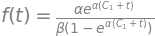

In [6]:
#Code derived from allen's chapter 9 
t = symbols('t')
f = Function('f')
dfdt = diff(f(t), t)
alpha = symbols('alpha')
beta=symbols('beta')
C1, p_0 = symbols('C1 p_0')


#Create the expression below and use dsolve to solve the differential equation  
eq1 = Eq(dfdt, alpha*f(t)+ beta*f(t)**2)
ans_eq1=dsolve(eq1)


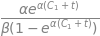

In [7]:
#Now solve the general solution
gen=ans_eq1.rhs



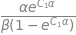

In [8]:
#evaluate at t=0
at_0=gen.subs(t,0)


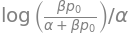

In [10]:
#at=0 and solve for C1
sol = solve(Eq(at_0, p_0), C1)
c1V=sol[0]



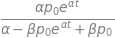

In [12]:
#replace c1 with its value
part=gen.subs(C1,c1V)
part=simplify(part)

Exercise 2
    Find the general solution and also the particular solution where f(0) = p_0.

In [13]:
#Inserting the repsonse given by wolframalpha, used the formula(df(t) / dt = alpha f(t)+ beta*f(t)^2)
ans_eq1
## The actual picture
from PIL import Image
ans1 = Image.open("ans.png")
ans1.show()
